In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
resnet34_not_pretrain_root_path = pj(os.getcwd(), "figure/image2size/ResNet34_b80_lr1e-4_not_pretrain")
resnet34_freeze_root_path = pj(os.getcwd(), "figure/image2size/ResNet34_b80_lr1e-4_freeze")
resnet34_root_path = pj(os.getcwd(), "figure/image2size/ResNet34_b80_lr1e-4")
resnet34_OS_root_path = pj(os.getcwd(), "figure/image2size/ResNet34_b80_lr1e-4_OS")
resnet34_all02_root_path = pj(os.getcwd(), "figure/image2size/ResNet34_b80_lr1e-4_all02")
resnet34_OS_all02_root_path = pj(os.getcwd(), "figure/image2size/ResNet34_b80_lr1e-4_OS_all02")
resnet34_AugScale_root_path = pj(os.getcwd(), "figure/image2size/ResNet34_b80_lr1e-4_aug_scale")
resnet34_all02_AugScale_root_path = pj(os.getcwd(), "figure/image2size/ResNet34_b80_lr1e-4_all02_aug_scale")
resnet34_all02withResize_root_path = pj(os.getcwd(), "figure/image2size/ResNet34_b80_lr1e-4_all02withResize")

### L1loss, unit == [ pixel ]

In [3]:
resnet34_not_pretrain = pd.read_csv(pj(resnet34_not_pretrain_root_path, "final_loss_5.csv"))
resnet34_freeze = pd.read_csv(pj(resnet34_freeze_root_path, "final_loss_5.csv"))
resnet34 = pd.read_csv(pj(resnet34_root_path, "final_loss_5.csv"))
resnet34_OS = pd.read_csv(pj(resnet34_OS_root_path, "final_loss_5.csv"))
resnet34_all02 = pd.read_csv(pj(resnet34_all02_root_path, "final_loss_5.csv"))
resnet34_OS_all02 = pd.read_csv(pj(resnet34_OS_all02_root_path, "final_loss_5.csv"))
resnet34_AugScale = pd.read_csv(pj(resnet34_AugScale_root_path, "final_loss_5.csv"))
resnet34_all02_AugScale = pd.read_csv(pj(resnet34_all02_AugScale_root_path, "final_loss_5.csv"))
resnet34_all02withResize = pd.read_csv(pj(resnet34_all02withResize_root_path, "final_loss_5.csv"))

In [4]:
exp_name = ["resnet34_not_pretrain", 
            "resnet34_freeze", 
            "resnet34", 
            "resnet34_OS",
            "resnet34_all02", 
            "resnet34_OS_all02",
            "resnet34_AugScale", 
            "resnet34_all02_AugScale", 
            "resnet34_all02withResize", 
           ]
exp_loss_pixel = [resnet34_not_pretrain["test"][0],
                  resnet34_freeze["test"][0], 
                  resnet34["test"][0],
                  resnet34_OS["test"][0],
                  resnet34_all02["test"][0],
                  resnet34_OS_all02["test"][0],
                  resnet34_AugScale["test"][0],
                  resnet34_all02_AugScale["test"][0],
                  resnet34_all02withResize["test"][0],
                 ]

In [5]:
df = pd.DataFrame({"L1loss[pixel]": exp_loss_pixel})
df.index = exp_name
df

,L1loss[pixel]
resnet34_not_pretrain,6.930726
resnet34_freeze,12.375613
resnet34,5.155222
resnet34_OS,5.143435
resnet34_all02,4.581348
resnet34_OS_all02,4.608462
resnet34_AugScale,5.028621
resnet34_all02_AugScale,4.759778
resnet34_all02withResize,4.592479


### L1loss, unit == [ L1loss / gt_size ]

In [6]:
exp_paths = [resnet34_not_pretrain_root_path, 
             resnet34_freeze_root_path, 
             resnet34_root_path, 
             resnet34_OS_root_path, 
             resnet34_all02_root_path, 
             resnet34_OS_all02_root_path, 
             resnet34_AugScale_root_path, 
             resnet34_all02_AugScale_root_path, 
             resnet34_all02withResize_root_path, 
            ]
eval_files = ["output_size_1.csv", "output_size_2.csv", "output_size_3.csv", "output_size_4.csv", "output_size_5.csv"]

In [7]:
exp_loss_percent_array = []
for path in exp_paths:
    size_array = []
    eval_size_array = []
    for i, file in enumerate(eval_files):
        eval_file_path = pj(path, file)
        eval_file = pd.read_csv(eval_file_path)
        crossvalid_elem_num = int(len(eval_file["size"]) / 5)
        size_array.extend(eval_file["size"][i * crossvalid_elem_num: (i+1) * crossvalid_elem_num])
        eval_size_array.extend(eval_file["eval_size"][i * crossvalid_elem_num: (i+1) * crossvalid_elem_num])
    crossvalid_output = pd.DataFrame({"size": size_array, "eval_size": eval_size_array})
    exp_loss_percent = np.sum(np.abs((crossvalid_output["size"] - crossvalid_output["eval_size"]) / crossvalid_output["size"])) / len(eval_file["size"])
    exp_loss_percent_array.append(exp_loss_percent)

In [8]:
df = pd.DataFrame({"L1loss": exp_loss_percent_array})
df.index = exp_name
df

,L1loss
resnet34_not_pretrain,0.172418
resnet34_freeze,0.317111
resnet34,0.124140
resnet34_OS,0.126128
resnet34_all02,0.112651
resnet34_OS_all02,0.113296
resnet34_AugScale,0.121050
resnet34_all02_AugScale,0.115186
resnet34_all02withResize,0.113131


### Error Analysis

### --- size distribution and L1loss ---

In [9]:
# version pixel
exp_loss_percent_per_SizeRank_array_ver_pixel = []
for path in exp_paths:
    size_array = []
    eval_size_array = []
    for i, file in enumerate(eval_files):
        eval_file_path = pj(path, file)
        eval_file = pd.read_csv(eval_file_path)
        crossvalid_elem_num = int(len(eval_file["size"]) / 5)
        if i == 4:
            size_array.extend(eval_file["size"][i * crossvalid_elem_num:])
            eval_size_array.extend(eval_file["eval_size"][i * crossvalid_elem_num:])
        else:
            size_array.extend(eval_file["size"][i * crossvalid_elem_num: (i+1) * crossvalid_elem_num])
            eval_size_array.extend(eval_file["eval_size"][i * crossvalid_elem_num: (i+1) * crossvalid_elem_num])
    crossvalid_output = pd.DataFrame({"size": size_array, "eval_size": eval_size_array})
    crossvalid_output["size_rank"] = np.floor(np.log2(crossvalid_output["size"]))
    exp_eval_array = []
    for i in range(7):
        SizeRank_filter = np.array(crossvalid_output["size_rank"] == (i+1))
        exp_loss_percent_per_SizeRank = np.sum(np.abs(crossvalid_output["size"][SizeRank_filter] - crossvalid_output["eval_size"][SizeRank_filter])) / len(eval_file["size"][SizeRank_filter])
        exp_eval_array.append(exp_loss_percent_per_SizeRank)
    exp_loss_percent_per_SizeRank_array_ver_pixel.append(exp_eval_array)

In [10]:
size_rank_array = np.array(crossvalid_output["size_rank"])
idx, count = np.unique(size_rank_array, return_counts=True)
print("size_rank_idx = {}".format(idx))
print("size_rank_count = {}".format(count))

count_percent = count / count.sum()
print("size_rank_percentage = {}".format(count_percent))

size_rank_idx = [1. 2. 3. 4. 5. 6. 7.]
size_rank_count = [   2   26   71  483 1295  578   21]
size_rank_percentage = [0.00080775 0.01050081 0.02867528 0.1950727  0.523021   0.23344103
 0.00848142]


In [11]:
data_index = ["1", "2", "3", "4", "5", "6", "7"]
data_dict = {}
for name, loss_array in zip(exp_name, exp_loss_percent_per_SizeRank_array_ver_pixel):
    data_dict.update({name: loss_array})
df_ver_pixel = pd.DataFrame(data_dict)
df_ver_pixel["size_dist"] = count
df_ver_pixel.index = data_index
df_ver_pixel

,resnet34_not_pretrain,resnet34_freeze,resnet34,resnet34_OS,resnet34_all02,resnet34_OS_all02,resnet34_AugScale,resnet34_all02_AugScale,resnet34_all02withResize,size_dist
1,6.038437,19.494865,3.924892,5.261707,4.567412,5.108935,4.062972,5.246312,2.633075,2
2,7.616216,19.397159,5.723209,6.533063,5.298300,5.255618,5.851408,5.079027,5.877220,26
3,5.352219,14.277877,3.630378,4.039608,3.329376,3.626785,3.194038,3.423588,3.622133,71
4,6.496500,12.466949,4.103396,3.890470,3.626988,3.660546,3.837590,3.580802,3.581725,483
5,5.679177,7.431438,4.351008,4.464128,4.194002,4.095421,4.474575,4.284907,4.086723,1295
6,9.047110,20.482596,7.120884,6.989603,5.811638,6.097546,6.781405,6.505298,6.153632,578
7,39.592141,76.236007,28.829723,26.566852,19.767455,18.759812,23.080345,17.248475,17.424906,21


In [12]:
# version ratio (L1loss / gt_size)
exp_loss_percent_per_SizeRank_array_ver_ratio = []
for path in exp_paths:
    size_array = []
    eval_size_array = []
    for i, file in enumerate(eval_files):
        eval_file_path = pj(path, file)
        eval_file = pd.read_csv(eval_file_path)
        crossvalid_elem_num = int(len(eval_file["size"]) / 5)
        if i == 4:
            size_array.extend(eval_file["size"][i * crossvalid_elem_num:])
            eval_size_array.extend(eval_file["eval_size"][i * crossvalid_elem_num:])
        else:
            size_array.extend(eval_file["size"][i * crossvalid_elem_num: (i+1) * crossvalid_elem_num])
            eval_size_array.extend(eval_file["eval_size"][i * crossvalid_elem_num: (i+1) * crossvalid_elem_num])
    crossvalid_output = pd.DataFrame({"size": size_array, "eval_size": eval_size_array})
    crossvalid_output["size_rank"] = np.floor(np.log2(crossvalid_output["size"]))
    exp_eval_array = []
    for i in range(7):
        SizeRank_filter = np.array(crossvalid_output["size_rank"] == (i+1))
        exp_loss_percent_per_SizeRank = np.sum(np.abs((crossvalid_output["size"][SizeRank_filter] - crossvalid_output["eval_size"][SizeRank_filter]) / crossvalid_output["size"][SizeRank_filter])) / len(eval_file["size"][SizeRank_filter])
        exp_eval_array.append(exp_loss_percent_per_SizeRank)
    exp_loss_percent_per_SizeRank_array_ver_ratio.append(exp_eval_array)

In [13]:
data_index = ["1", "2", "3", "4", "5", "6", "7"]
data_dict = {}
for name, loss_array in zip(exp_name, exp_loss_percent_per_SizeRank_array_ver_ratio):
    data_dict.update({name: loss_array})
df_ver_ratio = pd.DataFrame(data_dict)
df_ver_ratio["size_dist"] = count
df_ver_ratio.index = data_index
df_ver_ratio

,resnet34_not_pretrain,resnet34_freeze,resnet34,resnet34_OS,resnet34_all02,resnet34_OS_all02,resnet34_AugScale,resnet34_all02_AugScale,resnet34_all02withResize,size_dist
1,1.834875,5.760404,1.198641,1.545106,1.372748,1.518487,1.200182,1.560712,0.796274,2
2,1.343304,3.213547,1.008585,1.151899,0.935504,0.922144,1.034863,0.893359,1.030587,26
3,0.428996,1.276642,0.291515,0.324346,0.261416,0.289133,0.249218,0.271985,0.293259,71
4,0.271015,0.512446,0.170214,0.161177,0.150511,0.151315,0.159374,0.149490,0.148469,483
5,0.123321,0.161452,0.094973,0.097694,0.091109,0.089116,0.097388,0.093059,0.088369,1295
6,0.106519,0.228166,0.084248,0.083138,0.068915,0.072311,0.080193,0.076581,0.072976,578
7,0.272253,0.523878,0.199535,0.182572,0.136855,0.133094,0.160940,0.122420,0.124357,21


### (1) compare Transfer Learning

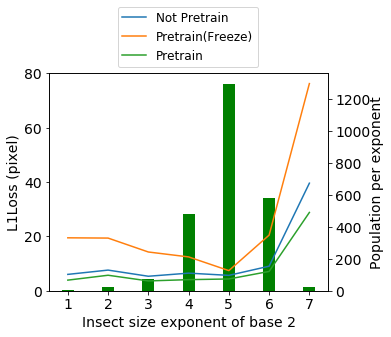

In [14]:
# version pixel
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["1", "2", "3", "4", "5", "6", "7"]

ax1.bar(x_label, df_ver_pixel["size_dist"], width=0.3, color="g")
ax2.plot(x_label, df_ver_pixel["resnet34_not_pretrain"], label="Not Pretrain")
ax2.plot(x_label, df_ver_pixel["resnet34_freeze"], label="Pretrain(Freeze)")
ax2.plot(x_label, df_ver_pixel["resnet34"], label="Pretrain")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.77, 1.0), loc='lower right', fontsize=12)

ax1.set_xlabel("Insect size exponent of base 2", fontsize=14)
ax1.set_ylabel("L1Loss (pixel)", fontsize=14)
ax1.yaxis.set_label_coords(-0.1, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per exponent", fontsize=14)
ax2.set_ylim(0., 80.0)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/master_paper/size_estimation/compare_method/comp_TL_from_size_dist_ver_pixel.png", bbox_inches="tight")

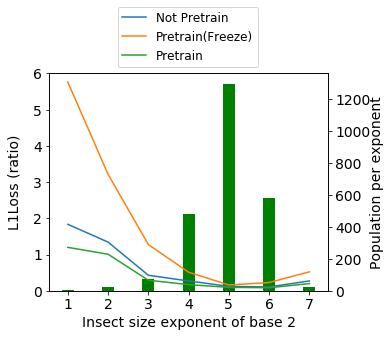

In [15]:
# version ratio (L1loss / gt_size)
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["1", "2", "3", "4", "5", "6", "7"]

ax1.bar(x_label, df_ver_ratio["size_dist"], width=0.3, color="g")
ax2.plot(x_label, df_ver_ratio["resnet34_not_pretrain"], label="Not Pretrain")
ax2.plot(x_label, df_ver_ratio["resnet34_freeze"], label="Pretrain(Freeze)")
ax2.plot(x_label, df_ver_ratio["resnet34"], label="Pretrain")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.77, 1.0), loc='lower right', fontsize=12)

ax1.set_xlabel("Insect size exponent of base 2", fontsize=14)
ax1.set_ylabel("L1Loss (ratio)", fontsize=14)
ax1.yaxis.set_label_coords(-0.1, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per exponent", fontsize=14)
ax2.set_ylim(0., 6.0)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/master_paper/size_estimation/compare_method/comp_TL_from_size_dist_ver_ratio.png", bbox_inches="tight")

### (1) Compare OverSampling + RandomAug

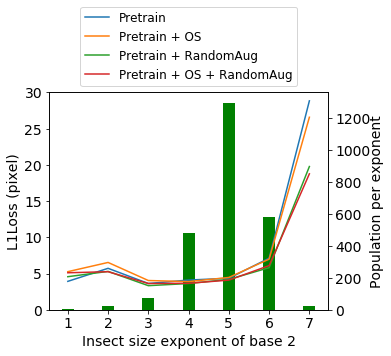

In [16]:
# version pixel
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["1", "2", "3", "4", "5", "6", "7"]

ax1.bar(x_label, df_ver_pixel["size_dist"], width=0.3, color="g")
ax2.plot(x_label, df_ver_pixel["resnet34"], label="Pretrain")
ax2.plot(x_label, df_ver_pixel["resnet34_OS"], label="Pretrain + OS")
ax2.plot(x_label, df_ver_pixel["resnet34_all02"], label="Pretrain + RandomAug")
ax2.plot(x_label, df_ver_pixel["resnet34_OS_all02"], label="Pretrain + OS + RandomAug")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.91, 1.0), loc='lower right', fontsize=12)

ax1.set_xlabel("Insect size exponent of base 2", fontsize=14)
ax1.set_ylabel("L1Loss (pixel)", fontsize=14)
ax1.yaxis.set_label_coords(-0.1, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per exponent", fontsize=14)
ax2.set_ylim(0., 30.0)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/master_paper/size_estimation/compare_method/comp_OSplusRandomAug_from_size_dist_ver_pixel.png", bbox_inches="tight")

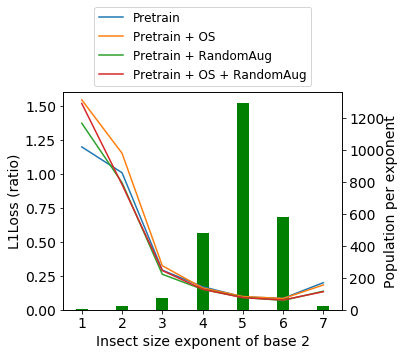

In [17]:
# version ratio (L1loss / gt_size)
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["1", "2", "3", "4", "5", "6", "7"]

ax1.bar(x_label, df_ver_ratio["size_dist"], width=0.3, color="g")
ax2.plot(x_label, df_ver_ratio["resnet34"], label="Pretrain")
ax2.plot(x_label, df_ver_ratio["resnet34_OS"], label="Pretrain + OS")
ax2.plot(x_label, df_ver_ratio["resnet34_all02"], label="Pretrain + RandomAug")
ax2.plot(x_label, df_ver_ratio["resnet34_OS_all02"], label="Pretrain + OS + RandomAug")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.91, 1.0), loc='lower right', fontsize=12)

ax1.set_xlabel("Insect size exponent of base 2", fontsize=14)
ax1.set_ylabel("L1Loss (ratio)", fontsize=14)
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per exponent", fontsize=14)
ax2.set_ylim(0., 1.6)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/master_paper/size_estimation/compare_method/comp_OSplusRandomAug_from_size_dist_ver_ratio.png", bbox_inches="tight")

### (3) compare Augmentation

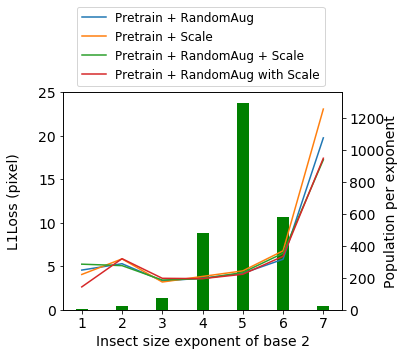

In [18]:
# version pixel
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["1", "2", "3", "4", "5", "6", "7"]

ax1.bar(x_label, df_ver_pixel["size_dist"], width=0.3, color="g")
ax2.plot(x_label, df_ver_pixel["resnet34_all02"], label="Pretrain + RandomAug")
ax2.plot(x_label, df_ver_pixel["resnet34_AugScale"], label="Pretrain + Scale")
ax2.plot(x_label, df_ver_pixel["resnet34_all02_AugScale"], label="Pretrain + RandomAug + Scale")
ax2.plot(x_label, df_ver_pixel["resnet34_all02withResize"], label="Pretrain + RandomAug with Scale")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.96, 1.0), loc='lower right', fontsize=12)

ax1.set_xlabel("Insect size exponent of base 2", fontsize=14)
ax1.set_ylabel("L1Loss (pixel)", fontsize=14)
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per exponent", fontsize=14)
ax2.set_ylim(0., 25.0)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/master_paper/size_estimation/compare_method/comp_Aug_from_size_dist_ver_pixel.png", bbox_inches="tight")

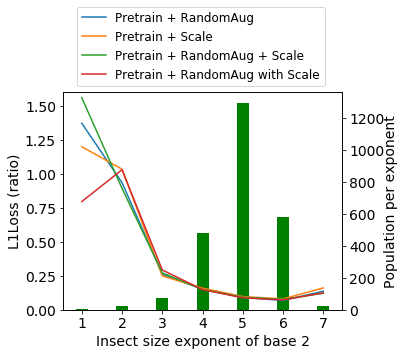

In [19]:
# version ratio (L1loss / gt_size)
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["1", "2", "3", "4", "5", "6", "7"]

ax1.bar(x_label, df_ver_ratio["size_dist"], width=0.3, color="g")
ax2.plot(x_label, df_ver_ratio["resnet34_all02"], label="Pretrain + RandomAug")
ax2.plot(x_label, df_ver_ratio["resnet34_AugScale"], label="Pretrain + Scale")
ax2.plot(x_label, df_ver_ratio["resnet34_all02_AugScale"], label="Pretrain + RandomAug + Scale")
ax2.plot(x_label, df_ver_ratio["resnet34_all02withResize"], label="Pretrain + RandomAug with Scale")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.96, 1.0), loc='lower right', fontsize=12)

ax1.set_xlabel("Insect size exponent of base 2", fontsize=14)
ax1.set_ylabel("L1Loss (ratio)", fontsize=14)
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per exponent", fontsize=14)
ax2.set_ylim(0., 1.6)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/master_paper/size_estimation/compare_method/comp_Aug_from_size_dist_ver_ratio.png", bbox_inches="tight")

### --- class and L1loss ---